In [1]:
import sys
!{sys.executable} -m pip install category_encoders


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\lacra\Envs\curs_python\Scripts\python.exe -m pip install --upgrade pip


# import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import naive_bayes, neighbors, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import KBinsDiscretizer, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import category_encoders as ce

# import dataset

In [3]:
df = pd.read_csv('adult.csv')
df.head(5) # preview of dataset

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [4]:
df.info() # view summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape # view dimension of the dataset

(32560, 15)

In [6]:
df['39'].value_counts() # view observations in '39' variable

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: 39, Length: 73, dtype: int64

In [7]:
df[' 77516'].value_counts() # view observations in ' 77516' variable

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name:  77516, Length: 21647, dtype: int64

In [8]:
# renaming the variables
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [9]:
# set the name of variables in dataset
df.columns = column_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
#preview of dataset after renaming the columns
df.head() 

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [11]:
#df.columns

In [12]:
# view summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [14]:
# this is our target variable, we want to predict for
df.income.value_counts() 

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [15]:
# analizing data with profile report
profile = ProfileReport(df, title = 'Analizing data with profile report')

In [16]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# looking for duplicates in our dataset
df.duplicated().value_counts()

False    32536
True        24
dtype: int64

In [18]:
# we have identified 24 duplicate raws and we will drop them for a cleaned dataset
df1 = df.drop_duplicates()

In [19]:
# checking for duplicates again - no dupplicates
df1.duplicated().value_counts() 

False    32536
dtype: int64

In [20]:
# looking for null values in workclass variable
df1.workclass.value_counts() 

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
'''as we see (with info function), there are no null values in dataset, because these values are named with '?'. 
Also we can see that some of the columns are numerical (int64) and others are categorical (object). We will exxtract the categorical columns from
the dataset in order to explore and clean it'''
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   workclass       32536 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education_num   32536 non-null  int64 
 5   marital_status  32536 non-null  object
 6   occupation      32536 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  object
 10  capital_gain    32536 non-null  int64 
 11  capital_loss    32536 non-null  int64 
 12  hours_per_week  32536 non-null  int64 
 13  native_country  32536 non-null  object
 14  income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [22]:
# we define a function to extract cetegorical data and to replace '?' values with nan in these ones 
"""def clean_data(data):
    cat_var = []
    for var in data.columns:
        if data[var].dtype == 'O': # extracting the categorical variables
            cat_var = var
            for obs in cat_var: # replacing '?' values with nan in categorical variables
                if obs == "?":
                    data[obs] = data[obs].replace('?', np.NaN, inplace = True)
    return data"""

'def clean_data(data):\n    cat_var = []\n    for var in data.columns:\n        if data[var].dtype == \'O\': # extracting the categorical variables\n            cat_var = var\n            for obs in cat_var: # replacing \'?\' values with nan in categorical variables\n                if obs == "?":\n                    data[obs] = data[obs].replace(\'?\', np.NaN, inplace = True)\n    return data'

In [23]:
# extracting the categorical variables
cat_val = [var for var in df1.columns if df1[var].dtype == 'O']
len(cat_val), cat_val

(9,
 ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country',
  'income'])

In [24]:
# preview of categorical variables
df1[cat_val].head()

workclass   education       marital_status          occupation  \
0   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
1            Private     HS-grad             Divorced   Handlers-cleaners   
2            Private        11th   Married-civ-spouse   Handlers-cleaners   
3            Private   Bachelors   Married-civ-spouse      Prof-specialty   
4            Private     Masters   Married-civ-spouse     Exec-managerial   

     relationship    race      sex  native_country  income  
0         Husband   White     Male   United-States   <=50K  
1   Not-in-family   White     Male   United-States   <=50K  
2         Husband   Black     Male   United-States   <=50K  
3            Wife   Black   Female            Cuba   <=50K  
4            Wife   White   Female   United-States   <=50K

In [25]:
# view of categorical variables - looking for missing values
for var in cat_val:
    print(df1[var].value_counts())

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial

In [26]:
# cleaning workclass variable
df1['workclass'].replace(' ?', np.nan, inplace = True)
df1.workclass.value_counts()

C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\2458015074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['workclass'].replace(' ?', np.nan, inplace = True)


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [27]:
# cleaning native_country variable
df1['native_country'].replace(' ?', np.nan, inplace = True)
df1.native_country.value_counts()

C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\4174372844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['native_country'].replace(' ?', np.nan, inplace = True)


 United-States                 29152
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [28]:
# cleaning occupation variable
df1['occupation'].replace(' ?', np.nan, inplace = True)
df1.occupation.value_counts()

C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\600035903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupation'].replace(' ?', np.nan, inplace = True)


 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
# check label in workclass variable
df1.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [30]:
# check label in occupation variable
df1.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
# for nan (missing) values in categorical variables we will fill them with most frequent value in each of thesee variables
# looking for missing values
df1[cat_val].isnull().mean()

workclass         0.056430
education         0.000000
marital_status    0.000000
occupation        0.056645
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017888
income            0.000000
dtype: float64

In [32]:
# printing variables with missing values
for col in cat_val:
    if df1[col].isnull().mean() > 0:
        print(col, df1[col].isnull().mean())

workclass 0.05642980083599705
occupation 0.0566449471354807
native_country 0.017887878042783377


In [33]:
#df1['workclass'].mode(), df1['occupation'].mode(), df1['native_country'].mode()

In [34]:
# replaceing missing values with most frequent value
df1.workclass.fillna(df1.workclass.mode()[0], inplace=True)
df1.occupation.fillna(df1.occupation.mode()[0], inplace=True)
df1.native_country.fillna(df1.native_country.mode()[0], inplace=True)

C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\2844891795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.workclass.fillna(df1.workclass.mode()[0], inplace=True)
C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\2844891795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.occupation.fillna(df1.occupation.mode()[0], inplace=True)
C:\Users\lacra\AppData\Local\Temp\ipykernel_17604\2844891795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [35]:
# extracting and cleaning the numerical variables
num_val = [var for var in df1.columns if df1[var].dtype != 'O']
len(num_val), num_val

(6,
 ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week'])

In [36]:
# preview o numerical variables
df1[num_val].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [37]:
# previewing and understanding numerical observations
df1[num_val].describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [38]:
# looking for missing values in numerical variables
df1[num_val].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32536 non-null  int64
 1   fnlwgt          32536 non-null  int64
 2   education_num   32536 non-null  int64
 3   capital_gain    32536 non-null  int64
 4   capital_loss    32536 non-null  int64
 5   hours_per_week  32536 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


In [39]:
# check for frequency distribution on capital_gain variable
df1.capital_gain.value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [40]:
# check for frequency on capital_loss variable
df1.capital_loss.value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [41]:
# drop the capital_gain and capital_loss variables
df2 = df1.drop(['capital_gain','capital_loss'], axis = 1)
# preview of dataset after droping the variables
df2.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   hours_per_week  native_country  income  
0              13   United-States   <=50K  
1              40   United-States   <=50K  
2              40   United-States   <=50K  
3              40            Cuba   <=50K  
4              40   United-States   <=50K

In [42]:
# all numerical variables looks good now
df2.describe() 

age        fnlwgt  education_num  hours_per_week
count  32536.000000  3.253600e+04   32536.000000    32536.000000
mean      38.585536  1.897843e+05      10.081725       40.440343
std       13.638193  1.055563e+05       2.571622       12.347079
min       17.000000  1.228500e+04       1.000000        1.000000
25%       28.000000  1.178315e+05       9.000000       40.000000
50%       37.000000  1.783560e+05      10.000000       40.000000
75%       48.000000  2.369932e+05      12.000000       45.000000
max       90.000000  1.484705e+06      16.000000       99.000000

In [43]:
# last checking for missing values in dataset
for col in df2:
    print(col, df2[col].isnull().mean())

age 0.0
workclass 0.0
fnlwgt 0.0
education 0.0
education_num 0.0
marital_status 0.0
occupation 0.0
relationship 0.0
race 0.0
sex 0.0
hours_per_week 0.0
native_country 0.0
income 0.0


In [44]:
# looking for correlations in our numerical variables
df2.corr()

age    fnlwgt  education_num  hours_per_week
age             1.000000 -0.076448       0.036224        0.068515
fnlwgt         -0.076448  1.000000      -0.043353       -0.018900
education_num   0.036224 -0.043353       1.000000        0.148426
hours_per_week  0.068515 -0.018900       0.148426        1.000000

<AxesSubplot:>

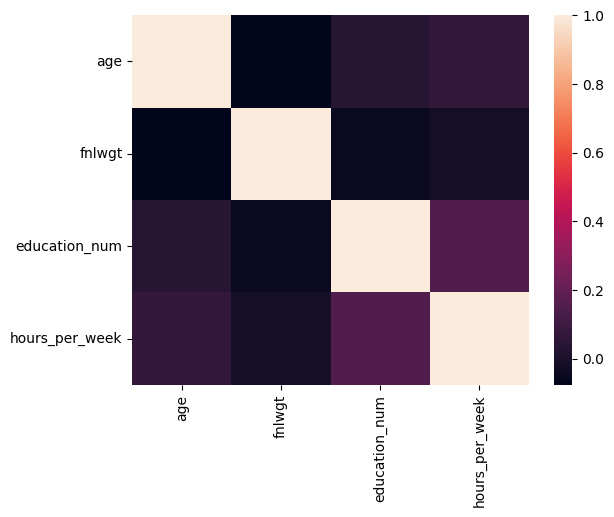

In [45]:
# view map correlation 
sns.heatmap(df2.corr())

In [46]:
# from correlation heatmap, we see that 'fnlwgt' variable is not correlated with any other numerical variable. Being so we wil drop it from our dataset.
df2 = df2.drop('fnlwgt', axis = 1)

In [47]:
# a quik preview of dataset
df2.sample(5)

age workclass      education  education_num       marital_status  \
11417   38   Private      Bachelors             13             Divorced   
28406   53   Private   Some-college             10             Divorced   
12470   24   Private   Some-college             10   Married-civ-spouse   
15192   22   Private        HS-grad              9   Married-civ-spouse   
27410   43   Private   Some-college             10   Married-civ-spouse   

             occupation relationship    race      sex  hours_per_week  \
11417             Sales    Unmarried   White   Female              40   
28406      Adm-clerical    Unmarried   White   Female              40   
12470      Craft-repair      Husband   White     Male              40   
15192   Priv-house-serv         Wife   White   Female              40   
27410             Sales      Husband   White     Male              40   

       native_country  income  
11417   United-States   <=50K  
28406   United-States   <=50K  
12470   United-States   <=50K  
15192   United-States   <=50K  
27410   United-States    >50K

<AxesSubplot:title={'center':'Dataset splited between genders'}, ylabel='Frequency'>

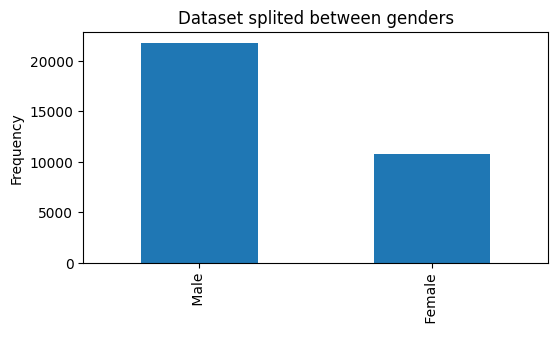

In [48]:
# view plot by gender

df2.sex.value_counts().plot(kind ='bar', 
                            ylabel = 'Frequency',
                            title = 'Dataset splited between genders', 
                            figsize = (6,3))

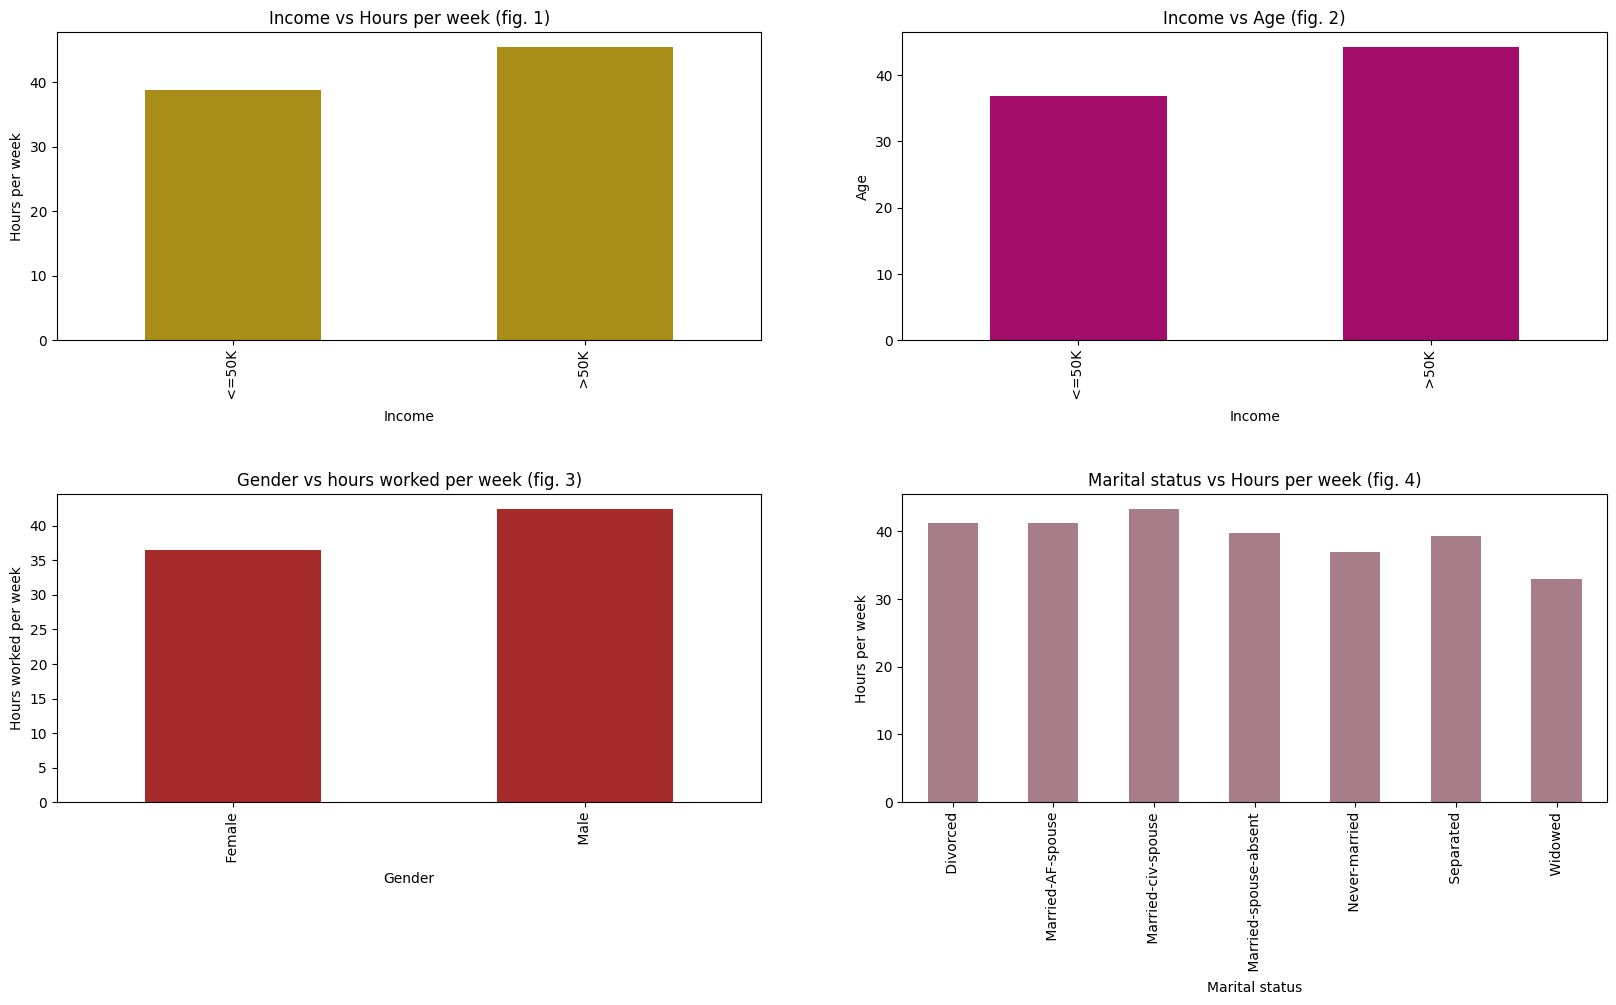

In [49]:
# plot views
# Gender vs Hours worked per week

fig, axes = plt.subplots(2,2, figsize=(20, 10))

df2.groupby(by="sex")['hours_per_week'].mean().plot(ax= axes[1][0],
                                                    kind = 'bar',
                                                    xlabel = 'Gender', 
                                                    ylabel = 'Hours worked per week',
                                                    title = 'Gender vs hours worked per week (fig. 3)',
                                                    color = 'brown', 
                                                    )

# Income vs age

df2.groupby('income')['age'].mean().plot(ax= axes[0][1],
                                         kind = 'bar', 
                                         xlabel = 'Income', 
                                         ylabel = 'Age', 
                                         title = 'Income vs Age (fig. 2)', 
                                         color = '#a30d69',
                                         )

# Income vs Hours worked per week

df2.groupby('income')['hours_per_week'].mean().plot(ax= axes[0][0],
                                                    kind = 'bar', 
                                                    xlabel = 'Income', 
                                                    ylabel = 'Hours per week', 
                                                    title = 'Income vs Hours per week (fig. 1)', 
                                                    color = '#a98d19',
                                                    )

# Marital status vs Hours worked per week

df2.groupby('marital_status')['hours_per_week'].mean().plot(ax= axes[1][1],
                                                            kind = 'bar', 
                                                            xlabel = 'Marital status', 
                                                            ylabel = 'Hours per week', 
                                                            title = 'Marital status vs Hours per week (fig. 4)', 
                                                            color = '#a67d89',
                                                            )

plt.subplots_adjust(hspace=0.5)
plt.show()

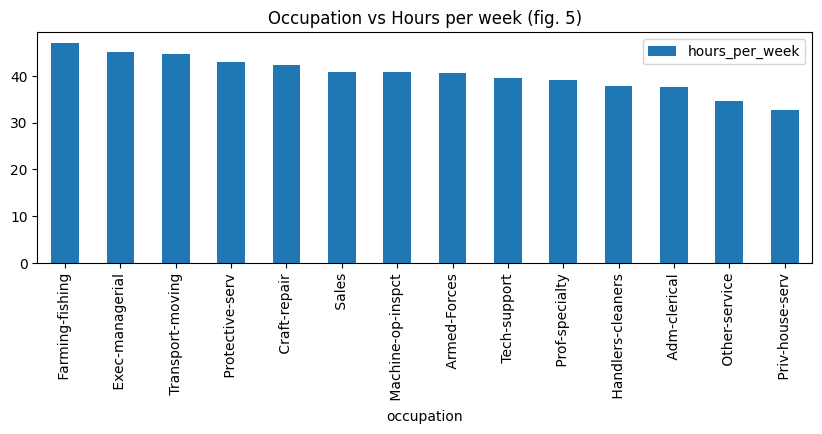

In [50]:
# view plot of hours worked per week depending on occupation

df_n = pd.DataFrame(df2.groupby(['occupation'])['hours_per_week'].mean().sort_values(ascending = False))

df_n.plot.bar(figsize=(10,3))
plt.title('Occupation vs Hours per week (fig. 5)')
plt.show()

<AxesSubplot:title={'center':'Work class vs hours worked per week (fig. 6)'}, xlabel='Work class', ylabel='Hours worked per week'>

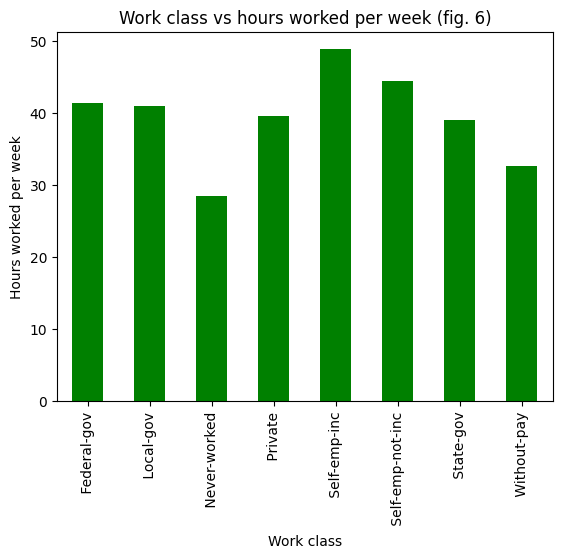

In [51]:
# plot view of workclass depending on how many hours worked per week

df2.groupby('workclass')['hours_per_week'].mean().plot(kind = 'bar', 
                                                       xlabel = 'Work class',
                                                       ylabel = 'Hours worked per week', 
                                                       title = 'Work class vs hours worked per week (fig. 6)', 
                                                       color = 'green')

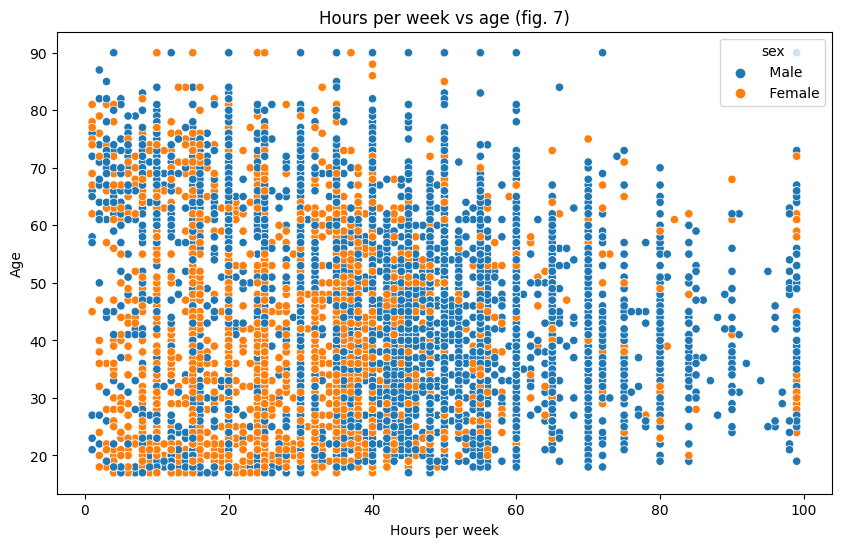

<Figure size 640x480 with 0 Axes>

In [52]:
# plot view of how many hours a female or male works, depending on their age

plt.figure(figsize=(10,6))

plt.title('Hours per week vs age (fig. 7)')
sns.scatterplot(x=df2['hours_per_week'],y=df2['age'], hue=df2['sex'])
plt.xlabel('Hours per week')
plt.ylabel('Age')

plt.show()
plt.tight_layout()

In [53]:
#df2.groupby(by="income")['education'].value_counts()

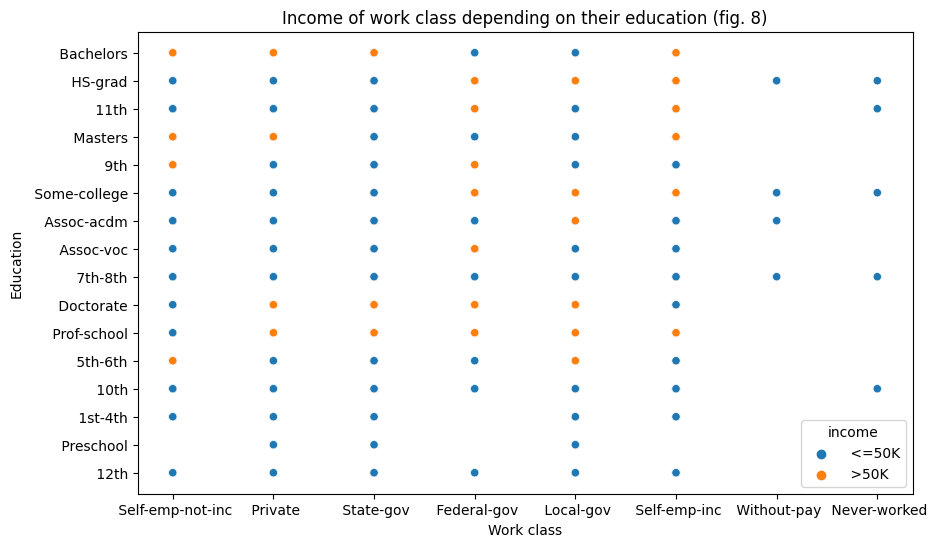

<Figure size 640x480 with 0 Axes>

In [54]:
# income plot view of workclass depending on education

plt.figure(figsize=(10,6))

plt.title('Income of work class depending on their education (fig. 8)')
sns.scatterplot(x=df2['workclass'].sort_values(),y=df2['education'].sort_values(), hue=df2['income'])
plt.xlabel('Work class')
plt.ylabel('Education')

plt.show()
plt.tight_layout()

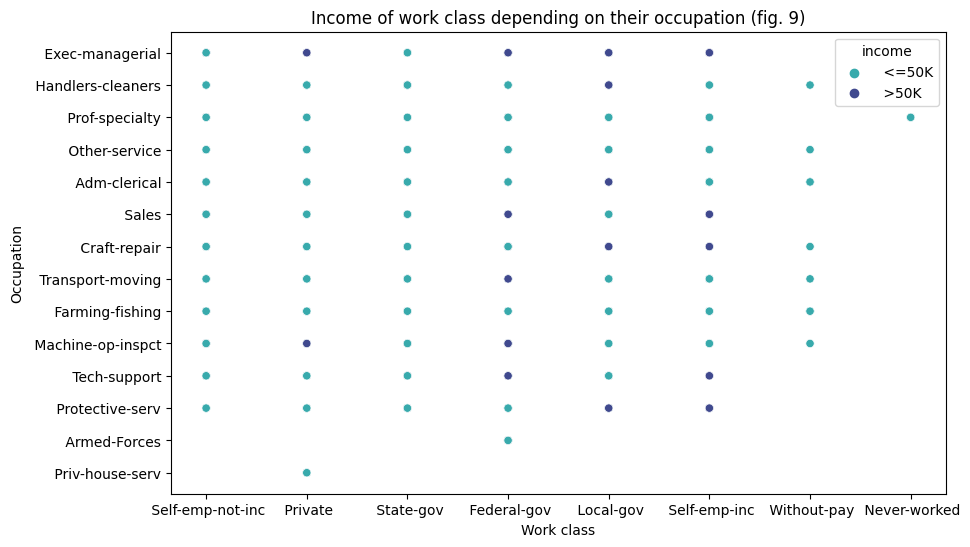

<Figure size 640x480 with 0 Axes>

In [55]:
# income plot view of workclass depending on occupation

plt.figure(figsize=(10,6))

plt.title('Income of work class depending on their occupation (fig. 9)')
sns.scatterplot(x=df2['workclass'].sort_values(),
                y=df2['occupation'].sort_values(), 
                hue=df2['income'], 
                palette= 'mako_r')
plt.xlabel('Work class')
plt.ylabel('Occupation')

plt.show()
plt.tight_layout()

In [56]:
# declare feature vector and target variable
X = df2.drop(['income'], axis = 1)
y = df2.income

In [57]:
# spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
# view dimension of the train and test set, after spilting
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22775, 11), (22775,), (9761, 11), (9761,))

In [59]:
# encode variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [60]:
#view dimension after encoding
X_train.shape, X_test.shape

((22775, 102), (9761, 102))

In [61]:
# preview of X_train set
X_train.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
21843   20            1            0            0            0            0   
1216    33            1            0            0            0            0   
27957   31            1            0            0            0            0   
24213   20            1            0            0            0            0   
20355   63            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  education_1  ...  \
21843            0            0            0            1  ...   
1216             0            0            0            0  ...   
27957            0            0            0            0  ...   
24213            0            0            0            0  ...   
20355            0            0            0            0  ...   

       native_country_32  native_country_33  native_country_34  \
21843                  0                  0                  0   
1216                   0                  0                  0   
27957                  0                  0                  0   
24213                  0                  0                  0   
20355                  0                  0                  0   

       native_country_35  native_country_36  native_country_37  \
21843                  0                  0                  0   
1216                   0                  0                  0   
27957                  0                  0                  0   
24213                  0                  0                  0   
20355                  0                  0                  0   

       native_country_38  native_country_39  native_country_40  \
21843                  0                  0                  0   
1216                   0                  0                  0   
27957                  0                  0                  0   
24213                  0                  0                  0   
20355                  0                  0                  0   

       native_country_41  
21843                  0  
1216                   0  
27957                  0  
24213                  0  
20355                  0  

[5 rows x 102 columns]

In [62]:
# define a variable 'cols' that takes as argument X_train columns

cols = X_train.columns

In [63]:
# scaling data

scaler = RobustScaler()

In [64]:
# apply scaling with fit and transform methods on our data

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
# set the X_train and X_test variuables with scaled data

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [66]:
# preview of X_train variable - to see how it look like

X_train.head()

age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5  \
0 -0.85         0.0         0.0         0.0         0.0         0.0   
1 -0.20         0.0         0.0         0.0         0.0         0.0   
2 -0.30         0.0         0.0         0.0         0.0         0.0   
3 -0.85         0.0         0.0         0.0         0.0         0.0   
4  1.30         0.0         0.0         0.0         0.0         0.0   

  workclass_6 workclass_7 workclass_8 education_1  ... native_country_32  \
0         0.0         0.0         0.0         1.0  ...               0.0   
1         0.0         0.0         0.0         0.0  ...               0.0   
2         0.0         0.0         0.0         0.0  ...               0.0   
3         0.0         0.0         0.0         0.0  ...               0.0   
4         0.0         0.0         0.0         0.0  ...               0.0   

  native_country_33 native_country_34 native_country_35 native_country_36  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  native_country_37 native_country_38 native_country_39 native_country_40  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  native_country_41  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 102 columns]

In [67]:
# instantiate the model - we train the model on the training data

model_gnb = GaussianNB()

# fit the model
model_gnb.fit(X_train, y_train)

GaussianNB()

In [68]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = model_gnb.predict(X_test)
y_pred_train = model_gnb.predict(X_train)

In [69]:
# preview of y_pred and y_pred_train

y_pred, y_pred_train

(array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
       dtype='<U6'),
 array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
       dtype='<U6'))

In [70]:
# calculate the accuracy score for the test set
accuracy_score(y_test, y_pred)

0.5334494416555681

In [71]:
# calculate the accuracy score for the training set
accuracy_score(y_train, y_pred_train)

0.5400219538968167

In [72]:
# calculate confusion matrix for the test set
confusion_matrix(y_test, y_pred)

array([[3042, 4413],
       [ 141, 2165]], dtype=int64)

In [73]:
# calculate confusion matrix for the training set
confusion_matrix(y_train, y_pred_train)

array([[ 7072, 10170],
       [  306,  5227]], dtype=int64)

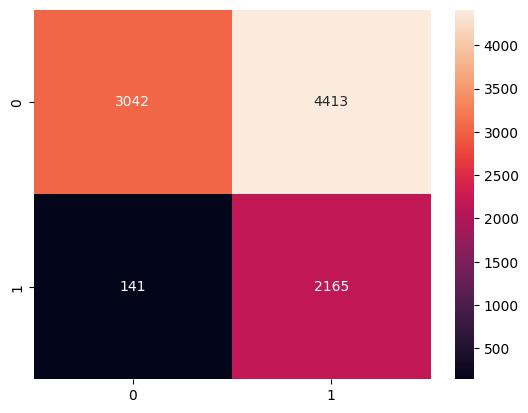

In [74]:
# for a better view of our confusion matrix, we will show our result using a graph

# confusion matrix graph for the test set 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

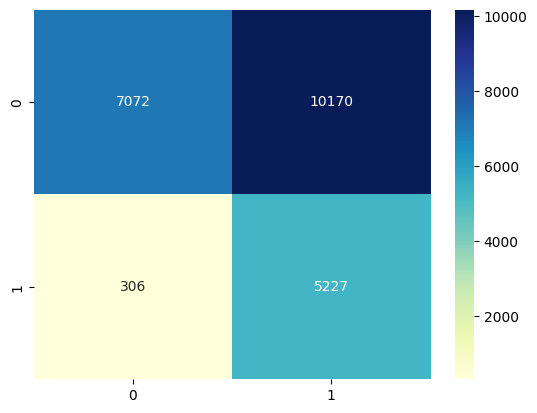

In [75]:
# confusion matrix graph for the training set 

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot = True, fmt = 'd', cmap='YlGnBu')
plt.show()

In [77]:
y_test, y_pred

(3643      <=50K
 25335      >50K
 9404      <=50K
 17909     <=50K
 5200       >50K
           ...  
 24152     <=50K
 12140      >50K
 20525     <=50K
 18205      >50K
 21694     <=50K
 Name: income, Length: 9761, dtype: object,
 array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
       dtype='<U6'))

In [78]:
precision_score(y_test, y_pred, average='micro')

0.5334494416555681

In [79]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.5334494416555681
Precision: 0.642414781055522
Recall: 0.673451725094714
F1-Score: 0.5296525398613907


In [80]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.5400219538968167
Precision: 0.6490035314198798
Recall: 0.6774283488888562
F1-Score: 0.5369833606509339


In [81]:
# show the results in a data frame

df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

index     metric     value
0  train   accuracy  0.540022
1   test   accuracy  0.533449
2  train  precision  0.649004
3   test  precision  0.642415
4  train     recall  0.677428
5   test     recall  0.673452
6  train         f1  0.536983
7   test         f1  0.529653

<AxesSubplot:xlabel='metric', ylabel='value'>

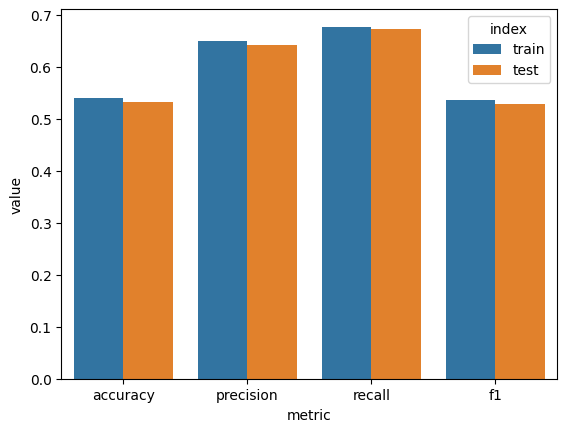

In [82]:
# show the results in a graph

sns.barplot(x='metric', y='value', hue='index', data=melted)

In [83]:
# first we will use logistic regression to train our model

logreg = LogisticRegression(random_state = 42, solver = 'liblinear')

In [84]:
# fit the model

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [85]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [86]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8350578834135847

In [87]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8367069154774972

In [88]:
confusion_matrix(y_test, y_pred)

array([[6877,  578],
       [1032, 1274]], dtype=int64)

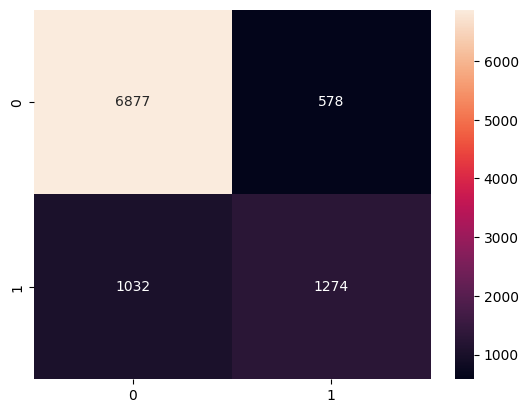

In [89]:
# confusion matrix graph for the test set 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

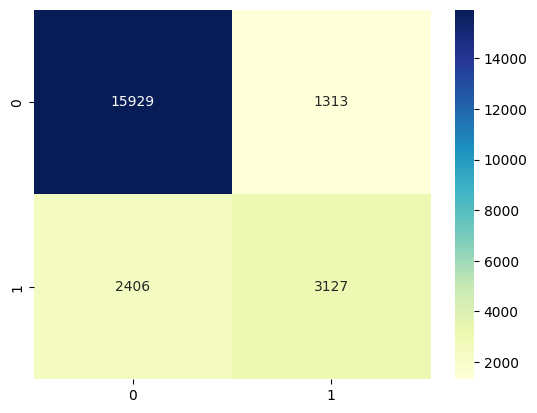

In [90]:
# confusion matrix graph for the training set 

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot = True, fmt = 'd', cmap='YlGnBu')
plt.show()

In [91]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8350578834135847
Precision: 0.7787103545814198
Recall: 0.7374699774245357
F1-Score: 0.754002096816468


In [92]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8367069154774972
Precision: 0.7865274225684642
Recall: 0.7445016344132378
F1-Score: 0.7612796617370541


In [93]:
# show the results in a data frame

df_dict_1 = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df_1 = pd.DataFrame.from_dict(df_dict_1, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted1 = pd.melt(df_1.reset_index(), id_vars='index', var_name='metric')
melted1

index     metric     value
0  train   accuracy  0.836707
1   test   accuracy  0.835058
2  train  precision  0.786527
3   test  precision  0.778710
4  train     recall  0.744502
5   test     recall  0.737470
6  train         f1  0.761280
7   test         f1  0.754002

In [94]:
# the second prediction model we want to use is KNeighbors classifier

knn = neighbors.KNeighborsClassifier()

In [95]:
# fit the model

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [97]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8170269439606598

In [98]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8714379802414929

In [99]:
confusion_matrix(y_test, y_pred)

array([[6612,  843],
       [ 943, 1363]], dtype=int64)

In [100]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8170269439606598
Precision: 0.7465211897280325
Recall: 0.7389941557410378
F1-Score: 0.7425896624472573


In [101]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8714379802414929
Precision: 0.8280868038307023
Recall: 0.8169637310009668
F1-Score: 0.8222695725589244


In [102]:
# show the results in a data frame

df_dict_2 = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df_2 = pd.DataFrame.from_dict(df_dict_2, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted2 = pd.melt(df_2.reset_index(), id_vars='index', var_name='metric')
melted2

index     metric     value
0  train   accuracy  0.871438
1   test   accuracy  0.817027
2  train  precision  0.828087
3   test  precision  0.746521
4  train     recall  0.816964
5   test     recall  0.738994
6  train         f1  0.822270
7   test         f1  0.742590

In [103]:
# set the parameters for KNeighbors Clasifier

params_dict = {'n_neighbors': list(range(1,21)), 
               'weights' : ['uniform', 'distance'],
              }

In [104]:
# apply randomized search using the parameters

randcv = RandomizedSearchCV(estimator = neighbors.KNeighborsClassifier(), 
                                       param_distributions = params_dict,
                                       random_state = 42, 
                                       n_jobs = -1)

In [105]:
# fit the model

randcv.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [106]:
# see the best parameters to use

randcv.best_params_

{'weights': 'uniform', 'n_neighbors': 14}

In [107]:
# using KNeighbors classifier prediction model with estimated parameters

knn1 = neighbors.KNeighborsClassifier(weights = 'uniform', n_neighbors = 14)

In [108]:
# fit the model

knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [109]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = knn1.predict(X_test)
y_pred_train = knn1.predict(X_train)

C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [110]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8289109722364512

In [111]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8505378704720088

In [112]:
confusion_matrix(y_test, y_pred)

array([[6807,  648],
       [1022, 1284]], dtype=int64)

In [113]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8289109722364512
Precision: 0.7670279872015893
Recall: 0.7349433984653804
F1-Score: 0.7483408053084348


In [114]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8505378704720088
Precision: 0.8052330245621224
Recall: 0.7699601758851411
F1-Score: 0.7848400192718441


In [115]:
# show the results in a data frame

df_dict_3 = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df_3 = pd.DataFrame.from_dict(df_dict_3, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted3 = pd.melt(df_3.reset_index(), id_vars='index', var_name='metric')
melted3

index     metric     value
0  train   accuracy  0.850538
1   test   accuracy  0.828911
2  train  precision  0.805233
3   test  precision  0.767028
4  train     recall  0.769960
5   test     recall  0.734943
6  train         f1  0.784840
7   test         f1  0.748341

In [116]:
svm_model = svm.SVC()

In [117]:
# fit the model

svm_model.fit(X_train, y_train)

SVC()

In [118]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

In [119]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8345456408154902

In [120]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8472886937431394

In [121]:
confusion_matrix(y_test, y_pred)

array([[6916,  539],
       [1076, 1230]], dtype=int64)

In [122]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8345456408154902
Precision: 0.7803367245142259
Recall: 0.7305453420145039
F1-Score: 0.7495649680423184


In [123]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8472886937431394
Precision: 0.8077819876744412
Recall: 0.7511835431506249
F1-Score: 0.7725898833157399


In [124]:
param_svc= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [125]:
rand_svc = RandomizedSearchCV(estimator = svm.SVC(), 
                                       param_distributions = param_svc,
                                       random_state = 42, 
                                       n_jobs = -1)

In [129]:
# because of our dataset, it takes too long to fit the model. This is why we will leave it and try with other prediction model
#rand_svc.fit(X_train, y_train)

In [127]:
#rand_svc.best_params_

In [ ]:
# The next model we will use for predictiong is DecisionTree Clasifier

In [130]:
dectree = DecisionTreeClassifier()

In [131]:
# fit the model

dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = dectree.predict(X_test)
y_pred_train = dectree.predict(X_train)

In [133]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.7841409691629956

In [134]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.9726015367727772

In [135]:
confusion_matrix(y_test, y_pred)

array([[6426, 1029],
       [1078, 1228]], dtype=int64)

In [136]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7841409691629956
Precision: 0.7002141761286611
Recall: 0.6972478409049265
F1-Score: 0.6986953615944653


In [137]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.9726015367727772
Precision: 0.9740501907339211
Recall: 0.950975212931373
F1-Score: 0.9618439539393624


In [138]:
rand_tree = RandomizedSearchCV(estimator = DecisionTreeClassifier(), 
                                       param_distributions = {'max_depth': list(range(3,10))},
                                       random_state = 42, 
                                       n_jobs = -1)

In [139]:
rand_tree.fit(X_train, y_train)

C:\Users\lacra\Envs\curs_python\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
                   random_state=42)

In [140]:
rand_tree.best_params_

{'max_depth': 7}

In [141]:
dectree1 = DecisionTreeClassifier(max_depth = 7)

In [142]:
dectree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [143]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = dectree1.predict(X_test)
y_pred_train = dectree1.predict(X_train)

In [144]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8296281118737834

In [145]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8400439077936334

In [146]:
confusion_matrix(y_test, y_pred)

array([[6749,  706],
       [ 957, 1349]], dtype=int64)

In [147]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8296281118737834
Precision: 0.7661293724421139
Recall: 0.7451470604488452
F1-Score: 0.7544880546144772


In [148]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8400439077936334
Precision: 0.7866787756600092
Recall: 0.7629680574586248
F1-Score: 0.7734486890186496


In [149]:
randomforest = RandomForestClassifier()

In [150]:

randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = randomforest.predict(X_test)
y_pred_train = randomforest.predict(X_train)

In [152]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8156951132056142

In [153]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.9725137211855104

In [154]:
confusion_matrix(y_test, y_pred)

array([[6659,  796],
       [1003, 1303]], dtype=int64)

In [155]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8156951132056142
Precision: 0.7449330136822931
Recall: 0.7291368622256813
F1-Score: 0.7362976802131418


In [156]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.9725137211855104
Precision: 0.9636419261618306
Recall: 0.9614724995871593
F1-Score: 0.9625510182832322


In [157]:
rand_forest = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                       param_distributions = {'n_estimators':[100, 200, 300, 400], 'max_depth': list(range(3,10))},
                                       random_state = 42, 
                                       n_jobs = -1)

In [158]:
rand_forest.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42)

In [159]:
rand_forest.best_params_

{'n_estimators': 200, 'max_depth': 9}

In [160]:
randomforest1 = RandomForestClassifier(n_estimators= 200, max_depth= 9)

In [161]:
randomforest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=200)

In [162]:
# define y_pred on the test set and y_pred_train on the training set for predicting the results

y_pred = randomforest1.predict(X_test)
y_pred_train = randomforest1.predict(X_train)

In [163]:
# calculate the accuracy score on the test model, using built in functions

accuracy_score(y_test, y_pred)

0.8288085237168323

In [164]:
# calculate the accuracy score on the training model, using built in functions

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8349066959385291

In [165]:
confusion_matrix(y_test, y_pred)

array([[7038,  417],
       [1254, 1052]], dtype=int64)

In [166]:
# calculate accuracy score, precision score, recall score and f1 score for the test set and also print them 

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro', pos_label = 1)
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.8288085237168323
Precision: 0.7824516613977828
Recall: 0.7001328002708358
F1-Score: 0.7256177714077359


In [167]:
# calculate accuracy score, precision score, recall score and f1 score for the training set and also print them 

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', pos_label = 1)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.8349066959385291
Precision: 0.8033154129956692
Recall: 0.711217247977374
F1-Score: 0.7389743501956745


In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7455
        >50K       0.72      0.46      0.56      2306

    accuracy                           0.83      9761
   macro avg       0.78      0.70      0.73      9761
weighted avg       0.82      0.83      0.81      9761

